<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [4]</a>'.</span>

# OpenPIV static masking example%load_ext watermark
%watermark -v -m -p numpy,openpiv -g -b

In [1]:
%load_ext watermark
%watermark -v -m -p numpy,openpiv -g -b

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 8.4.0

numpy  : 1.23.1
openpiv: 0.24.4a0

Compiler    : GCC 4.8.5 20150623 (Red Hat 4.8.5-44)
OS          : Linux
Release     : 5.4.0-131-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Git hash: 982832a2d87a3b9e116a68b52b3f917d88373c89

Git branch: main



In [2]:
from openpiv import tools
from openpiv.piv import simple_piv

import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
images = sorted(pathlib.Path('../test9').glob('*.jpg'))
print(images)

[PosixPath('../test9/karman_16Hz_000_A.jpg'), PosixPath('../test9/karman_16Hz_000_B.jpg')]


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

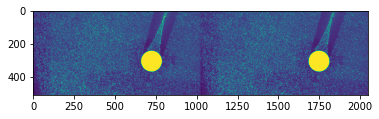

In [4]:
a,b = tools.imread(images[0]), tools.imread(images[1])
plt.imshow(np.c_[a,b])

We see the mask as a circle, but OpenPIV does not know about it, we see some vectors "inside the masked region". Since the arrows inside are erroneous, these are removed in the post-processing validation. 

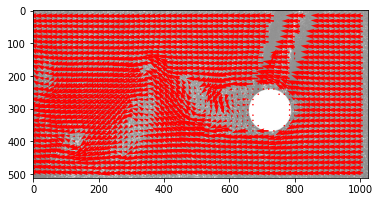

In [5]:
simple_piv(a,b);

## Let's create a mask - it's an image size matrix of booleans

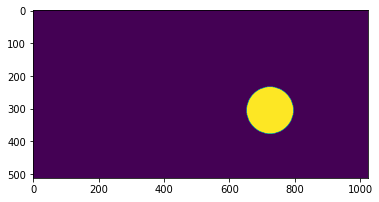

In [6]:
from skimage.morphology import binary_dilation, disk, white_tophat


# binary thresholding - all above 210 can be an object
mask = a > 210

# remove tracers:
mask = np.logical_xor(mask, white_tophat(mask, disk(3))) # remove small objects

# increase a bit the mask borders 
mask = binary_dilation(mask, disk(7)) # dilate large object

plt.imshow(mask)

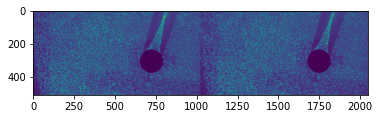

In [7]:
# long and descriptive way:
masked_a = a.copy()
masked_b = b.copy()
masked_a[mask] = 0
masked_b[mask] = 0
plt.imshow(np.c_[masked_a, masked_b])

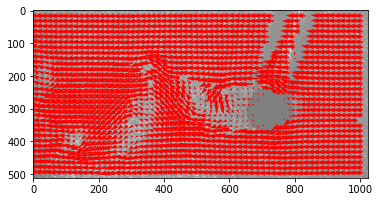

In [8]:
simple_piv(masked_a, masked_b);

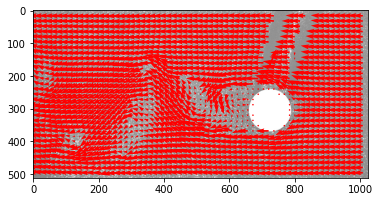

In [9]:
# shorthand
masked_a = a | mask
masked_b = b | mask
simple_piv(masked_a, masked_b);

## How to use static masking with multi-pass window deformation processor

In [10]:
from openpiv import windef
settings = windef.PIVSettings()
settings.filepath_images = pathlib.Path('.')
settings.frame_pattern_a = str(images[0])
settings.frame_pattern_b = str(images[1])

settings.static_masking = True
settings.static_mask = mask
settings.show_all_plots = True
settings.show_plot = True

.
../test9/karman_16Hz_000_A.jpg
True
[PosixPath('../test9/karman_16Hz_000_A.jpg')]


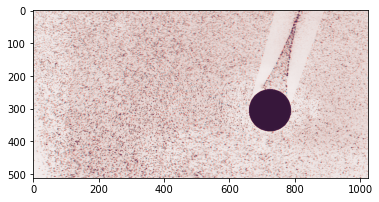

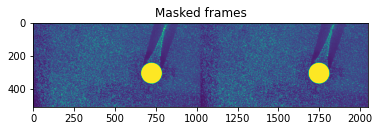

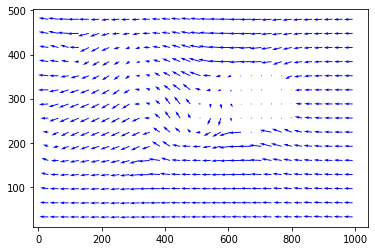

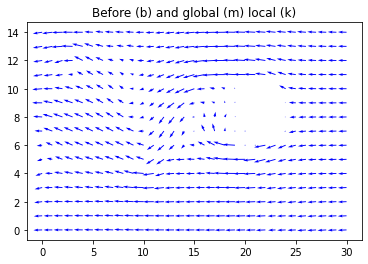

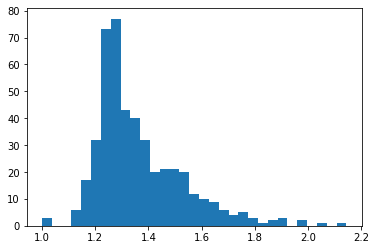

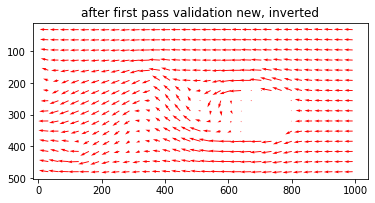

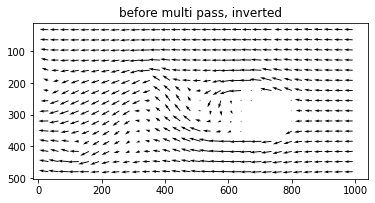

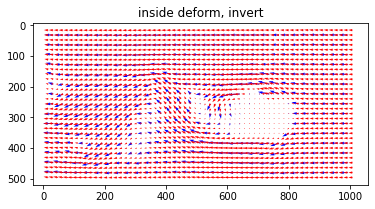

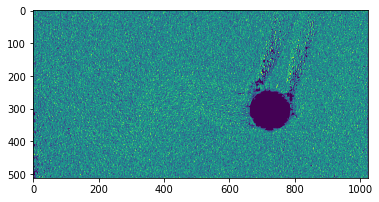

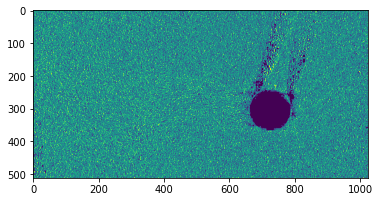

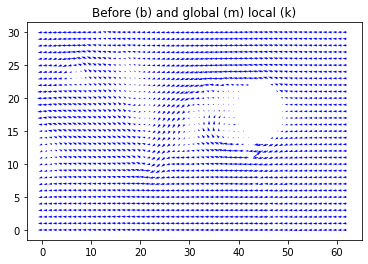

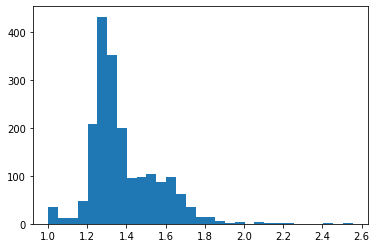

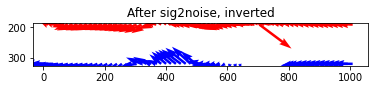

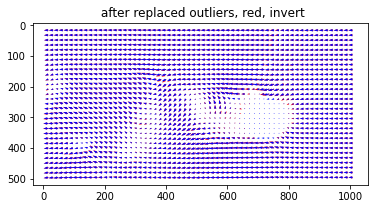

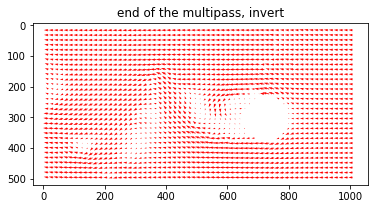

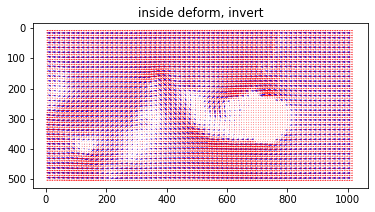

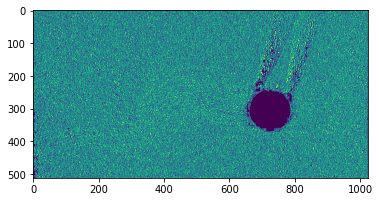

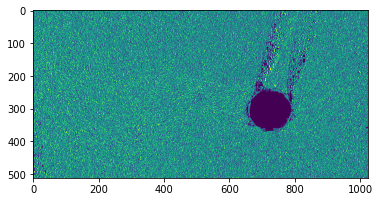

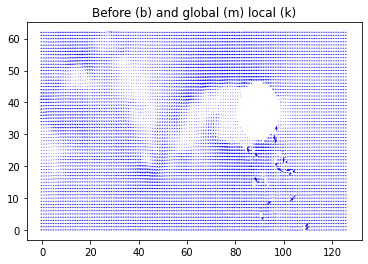

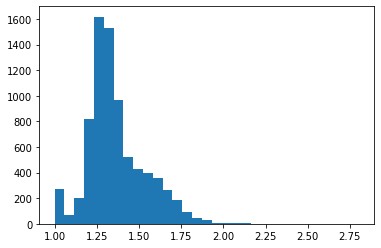

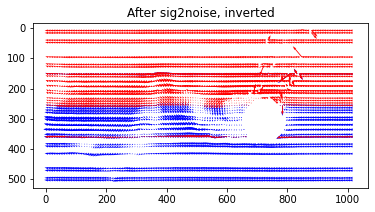

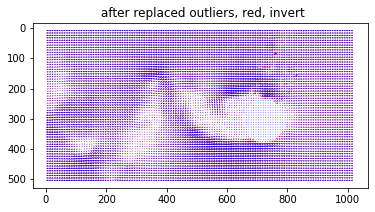

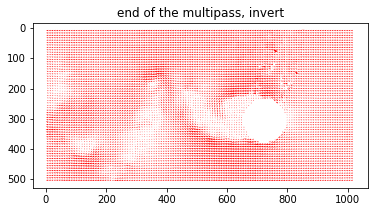

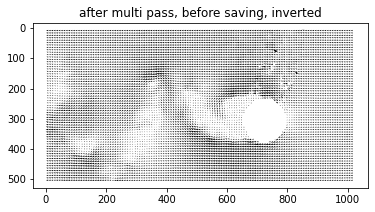

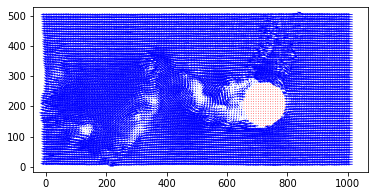

Image Pair 1
karman_16Hz_000_A karman_16Hz_000_B


In [11]:
windef.piv(settings)